In [22]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
%matplotlib notebook
from matplotlib.font_manager import FontProperties
import os
from shutil import copy

In [23]:
datadir = "/Users/Siwen/Desktop/ferret/bin"

dat_5179_8007 = 'mybs_5179_8007'
dat_8093_9407 = 'mybs_7993_9407'

path_5179_8007 = datadir + '/' + dat_5179_8007 + "_tau.nc"
path_8093_9407 = datadir + '/' + dat_8093_9407 + "_tau.nc"

f_5179_8007 = nc.Dataset(path_5179_8007, "r")
f_8093_9407 = nc.Dataset(path_8093_9407, "r")

#define regular p-value font, bold p-value font and bold+italic p-value font
#(used to show levels of statistical significance)
font0 = FontProperties()

In [24]:
#Load all necessary variables out of data file
f1_5179_in = f_5179_8007.variables['f1_p1_mean'][:]
f1_5179_std_in = f_5179_8007.variables['f1_p1_stdv'][:]
f1_8093_in = f_8093_9407.variables['f1_p1_mean'][:]
f1_8093_std_in = f_8093_9407.variables['f1_p1_stdv'][:]
f1_9407_in = f_8093_9407.variables['f1_p2_mean'][:]
f1_9407_std_in = f_8093_9407.variables['f1_p2_stdv'][:]

lat_5179_in = f_5179_8007.variables['lat_p1_mean'][:]
lat_5179_std_in = f_5179_8007.variables['lat_p1_stdv'][:]
lat_8093_in = f_8093_9407.variables['lat_p1_mean'][:]
lat_8093_std_in = f_8093_9407.variables['lat_p1_stdv'][:]
lat_9407_in = f_8093_9407.variables['lat_p2_mean'][:]
lat_9407_std_in = f_8093_9407.variables['lat_p2_stdv'][:]

int_5179_in = f_5179_8007.variables['int_p1_mean'][:]
int_5179_std_in = f_5179_8007.variables['int_p1_stdv'][:]
int_8093_in = f_8093_9407.variables['int_p1_mean'][:]
int_8093_std_in = f_8093_9407.variables['int_p1_stdv'][:]
int_9407_in = f_8093_9407.variables['int_p2_mean'][:]
int_9407_std_in = f_8093_9407.variables['int_p2_stdv'][:]

f1_5179_8007_diff_in = f_5179_8007.variables['f1_diff_p1'][:]
f1_8093_9407_diff_in = f_8093_9407.variables['f1_diff_p1'][:]

lat_5179_8007_diff_in = f_5179_8007.variables['lat_diff_p1'][:]
lat_8093_9407_diff_in = f_8093_9407.variables['lat_diff_p1'][:]

int_5179_8007_diff_in = f_5179_8007.variables['int_diff_p1'][:]
int_8093_9407_diff_in = f_8093_9407.variables['int_diff_p1'][:]



In [25]:
#LOAD P-VALUES
f1_5179_8007_diff = np.zeros(6)
f1_5179_8007_diff[0:3] = f1_5179_8007_diff_in[0:3]
f1_5179_8007_diff[3] = f1_5179_8007_diff_in[4]
f1_5179_8007_diff[4:6] = f1_5179_8007_diff_in[6:8]

f1_8093_9407_diff = np.zeros(6)
f1_8093_9407_diff[0:3] = f1_8093_9407_diff_in[0:3]
f1_8093_9407_diff[3] = f1_8093_9407_diff_in[4]
f1_8093_9407_diff[4:6] = f1_8093_9407_diff_in[6:8]

lat_5179_8007_diff = np.zeros(6)
lat_5179_8007_diff[0:3] = lat_5179_8007_diff_in[0:3]
lat_5179_8007_diff[3] = lat_5179_8007_diff_in[4]
lat_5179_8007_diff[4:6] = lat_5179_8007_diff_in[6:8]

lat_8093_9407_diff = np.zeros(6)
lat_8093_9407_diff[0:3] = lat_8093_9407_diff_in[0:3]
lat_8093_9407_diff[3] = lat_8093_9407_diff_in[4]
lat_8093_9407_diff[4:6] = lat_8093_9407_diff_in[6:8]

int_5179_8007_diff = np.zeros(6)
int_5179_8007_diff[0:3] = int_5179_8007_diff_in[0:3]
int_5179_8007_diff[3] = int_5179_8007_diff_in[4]
int_5179_8007_diff[4:6] = int_5179_8007_diff_in[6:8]

int_8093_9407_diff = np.zeros(6)
int_8093_9407_diff[0:3] = int_8093_9407_diff_in[0:3]
int_8093_9407_diff[3] = int_8093_9407_diff_in[4]
int_8093_9407_diff[4:6] = int_8093_9407_diff_in[6:8]

In [26]:
#customized script that adds overbars to indicate time periods, and then on top of that a p-value for the significance of the change.

def addpvals(fig,ax,rects1,rects2,rects3,errs1,errs2,errs3,pvals1,pvals2):
    for rect1,rect2,rect3,err1,err2,err3,pval1,pval2 in zip(rects1,rects2,rects3,errs1,errs2,errs3,pvals1,pvals2):
        
        height1 = rect1.get_height() + err1
        height2 = rect2.get_height() + err2
        height3 = rect3.get_height() + err3
            
        height = max(height1,height2,height3)
        yax = ax.get_ylim()
        yhgt = yax[1]-yax[0]
        
        x1 = rect1.get_x() + .175
        x2 = rect1.get_x() + .525
        y = height + .01*yhgt
        
        xx1 = rect1.get_x() + .4375
        xx2 = rect1.get_x() + .6125
        yy = y + .13*yhgt

        #'51-'79 v '80-'07
        ax.annotate("a", color='White', xy=(x1, y), xytext=(x1, y + .02*yhgt), 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=1.25, lengthB=.5', lw=1.0))

        ax.annotate("b", color='White', xy=(x2, y), xytext=(x2, y + .02*yhgt), 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=1.25, lengthB=.5', lw=1.0))

        #add lines
        plt.plot([x1, (x1+x2)/2], [y + .008*yhgt, y + .04*yhgt], 'k-', lw=1)
        plt.plot([x2, (x1+x2)/2], [y + .008*yhgt, y + .04*yhgt], 'k-', lw=1)

        #add p-value
        if pval1 < .025:
            if pval1 < .005:
                plt.text((x1+x2)/2, y + .06*yhgt,'p<.001', horizontalalignment = 'center',fontsize = 14, \
                    weight='bold', style='italic')

            else:
                plt.text((x1+x2)/2, y + .06*yhgt,'p=' + str(round(pval1,3)), horizontalalignment = 'center', fontsize = 14,\
                    weight='bold')
        elif pval1 > .975:            
            if pval1 > .995:
                plt.text((x1+x2)/2, y + .06*yhgt,'p>.999', horizontalalignment = 'center',fontsize = 14, \
                    weight='bold', style='italic')
            else:
                plt.text((x1+x2)/2, y + .06*yhgt,'p=' + str(round(pval1,3)), horizontalalignment = 'center', fontsize = 14,\
                    weight='bold')
        else:
            plt.text((x1+x2)/2, y + .06*yhgt,'p=' + str(round(pval1,3)), horizontalalignment = 'center', fontsize = 14)
            
        print(pval1)
        print(pval2)


        #'80-'93 v '94-'07
        ax.annotate("a", color='White', xy=(xx1, yy), xytext=(xx1, yy + .02*yhgt),\
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=.6, lengthB=.5', lw=1.0))

        ax.annotate("b", color='White', xy=(xx2, yy), xytext=(xx2, yy + .02*yhgt), 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=.6, lengthB=.5', lw=1.0))

        #add lines
        plt.plot([xx1, (xx1+xx2)/2], [yy + .008*yhgt, yy + .03*yhgt], 'k-', lw=1)
        plt.plot([xx2, (xx1+xx2)/2], [yy + .008*yhgt, yy + .03*yhgt], 'k-', lw=1)

        #add p-value
        if pval2 < .025:
            if pval2 < .001:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p<.001', horizontalalignment = 'center',fontsize = 14,\
                         weight='bold', style='italic')
            else:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p=' + str(round(pval2,3)), horizontalalignment = 'center', \
                         fontsize = 14, weight='bold')
        elif pval2 > .975:            
            if pval2 > .999:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p>.999', horizontalalignment = 'center',fontsize = 14, \
                         weight='bold', style='italic')
            else:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p=' + str(round(pval2,3)), horizontalalignment = 'center', \
                         fontsize = 14, weight='bold')
        else:
            plt.text((xx1+xx2)/2, yy + .06*yhgt,'p=' + str(round(pval2,3)), horizontalalignment = 'center', fontsize = 14)

In [27]:
N = 6               # number of data entries
ind = np.arange(N)              # the x locations for the groups
width1 = 0.35                   # bar width
width2 = 0.175

<IPython.core.display.Javascript object>


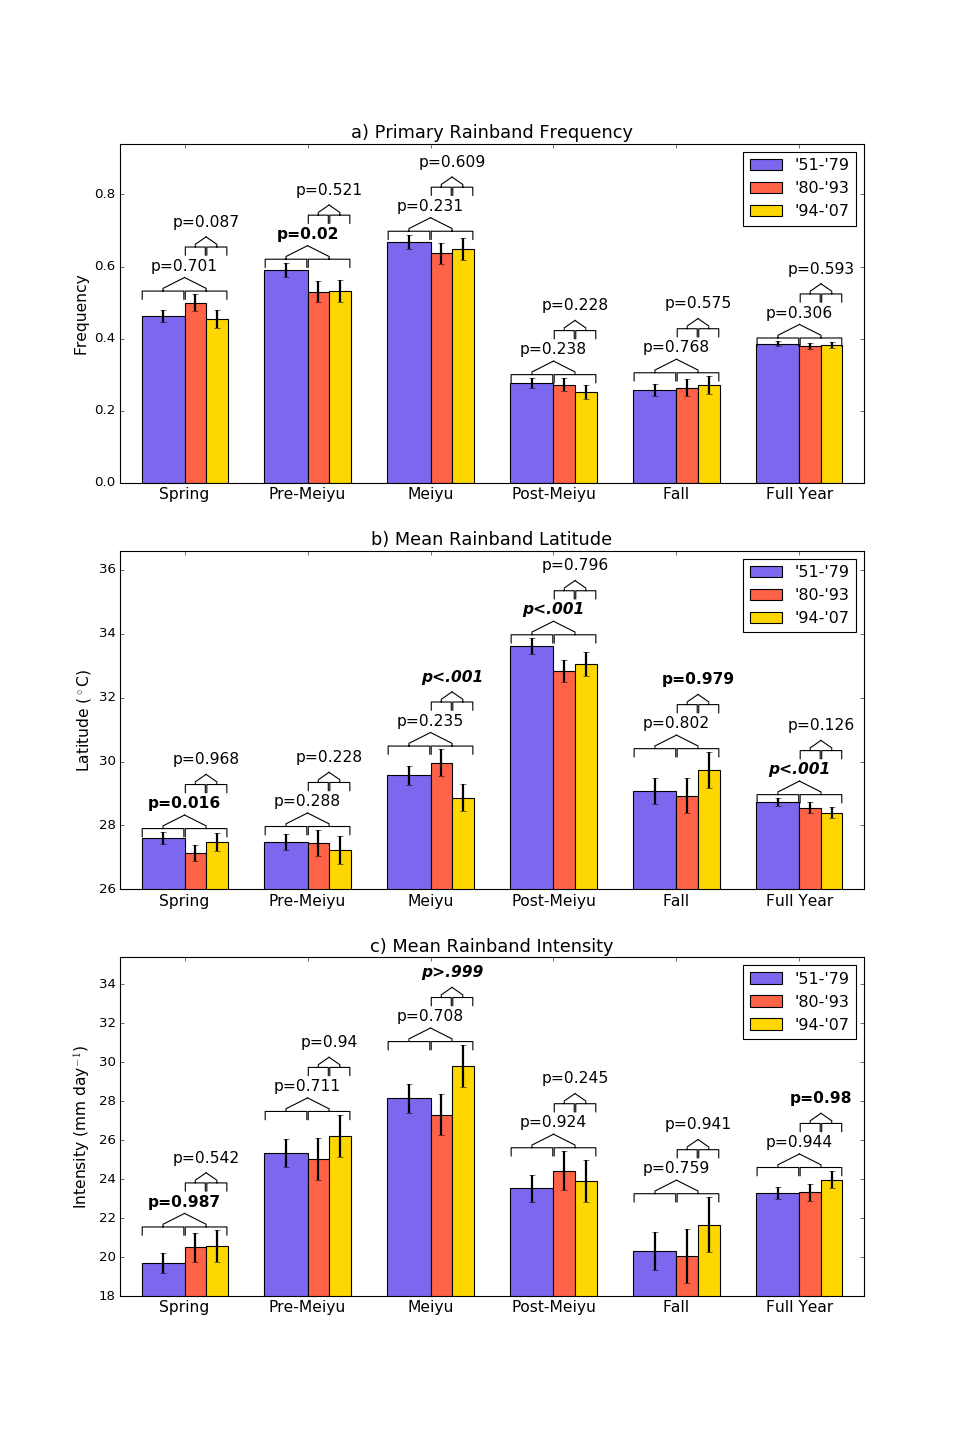

0.700689704
0.0872836514112
0.0204607694899
0.520555440566
0.23064162336
0.609165250501
0.237753666559
0.227971354919
0.76758220786
0.575391600426
0.305724836371
0.592960455303


In [28]:
f1_5179 = np.zeros(6)
f1_5179[0:3] = f1_5179_in[0:3]
f1_5179[3] = f1_5179_in[4]
f1_5179[4:6] = f1_5179_in[6:8]

f1_5179_std = np.zeros(6)
f1_5179_std[0:3] = f1_5179_std_in[0:3]
f1_5179_std[3] = f1_5179_std_in[4]
f1_5179_std[4:6] = f1_5179_std_in[6:8]

f1_8093 = np.zeros(6)
f1_8093[0:3] = f1_8093_in[0:3]
f1_8093[3] = f1_8093_in[4]
f1_8093[4:6] = f1_8093_in[6:8]

f1_8093_std = np.zeros(6)
f1_8093_std[0:3] = f1_8093_std_in[0:3]
f1_8093_std[3] = f1_8093_std_in[4]
f1_8093_std[4:6] = f1_8093_std_in[6:8]

f1_9407 = np.zeros(6)
f1_9407[0:3] = f1_9407_in[0:3]
f1_9407[3] = f1_9407_in[4]
f1_9407[4:6] = f1_9407_in[6:8]

f1_9407_std = np.zeros(6)
f1_9407_std[0:3] = f1_9407_std_in[0:3]
f1_9407_std[3] = f1_9407_std_in[4]
f1_9407_std[4:6] = f1_9407_std_in[6:8]

f1_5179_8007_diff = np.zeros(6)
f1_5179_8007_diff[0:3] = f1_5179_8007_diff_in[0:3]
f1_5179_8007_diff[3] = f1_5179_8007_diff_in[4]
f1_5179_8007_diff[4:6] = f1_5179_8007_diff_in[6:8]

f1_8093_9407_diff = np.zeros(6)
f1_8093_9407_diff[0:3] = f1_8093_9407_diff_in[0:3]
f1_8093_9407_diff[3] = f1_8093_9407_diff_in[4]
f1_8093_9407_diff[4:6] = f1_8093_9407_diff_in[6:8]

lat_5179_8007_diff = np.zeros(6)
lat_5179_8007_diff[0:3] = lat_5179_8007_diff_in[0:3]
lat_5179_8007_diff[3] = lat_5179_8007_diff_in[4]
lat_5179_8007_diff[4:6] = lat_5179_8007_diff_in[6:8]

lat_8093_9407_diff = np.zeros(6)
lat_8093_9407_diff[0:3] = lat_8093_9407_diff_in[0:3]
lat_8093_9407_diff[3] = lat_8093_9407_diff_in[4]
lat_8093_9407_diff[4:6] = lat_8093_9407_diff_in[6:8]

int_5179_8007_diff = np.zeros(6)
int_5179_8007_diff[0:3] = int_5179_8007_diff_in[0:3]
int_5179_8007_diff[3] = int_5179_8007_diff_in[4]
int_5179_8007_diff[4:6] = int_5179_8007_diff_in[6:8]

int_8093_9407_diff = np.zeros(6)
int_8093_9407_diff[0:3] = int_8093_9407_diff_in[0:3]
int_8093_9407_diff[3] = int_8093_9407_diff_in[4]
int_8093_9407_diff[4:6] = int_8093_9407_diff_in[6:8]

fig = plt.figure(figsize = (12,18))
ax1 = fig.add_subplot(311)

rects1 = ax1.bar(ind, f1_5179,                  # data
                width1,                          # bar width
                color='MediumSlateBlue',        # bar colour
                yerr=f1_5179_std,                  # data for error bars
                error_kw={'ecolor':'Black',    # error-bars colour
                          'linewidth':2})     

rects2 = ax1.bar(ind + width1, f1_8093, 
                width2, 
                color='Tomato', 
                yerr=f1_8093_std, 
                error_kw={'ecolor':'Black',
                          'linewidth':2})

rects3 = ax1.bar(ind + width1 + width2, f1_9407, 
                width2, 
                color='Gold', 
                yerr=f1_9407_std, 
                error_kw={'ecolor':'Black',
                          'linewidth':2})

#OPTIONAL: Change axes limits if necessary
ax1.set_ylim([0, .94])
ax1.set_xlim([-.175,5.875])     

addpvals(fig,ax1,rects1,rects2,rects3,f1_5179_std,f1_8093_std,f1_9407_std,f1_5179_8007_diff,f1_8093_9407_diff)

ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('a) Primary Rainband Frequency', fontsize=16)
ax1.set_xticks(ind + width1)
ax1.set_xticklabels(('Spring', 'Pre-Meiyu', 'Meiyu', 'Post-Meiyu', 'Fall','Full Year'), fontsize=14)

ax1.legend((rects1[0], rects2[0], rects3[0]), ("'51-'79", "'80-'93", "'94-'07"))

fig.show()

In [29]:
lat_5179 = np.zeros(6)
lat_5179[0:3] = lat_5179_in[0:3]
lat_5179[3] = lat_5179_in[4]
lat_5179[4:6] = lat_5179_in[6:8]

lat_5179_std = np.zeros(6)
lat_5179_std[0:3] = lat_5179_std_in[0:3]
lat_5179_std[3] = lat_5179_std_in[4]
lat_5179_std[4:6] = lat_5179_std_in[6:8]

lat_8093 = np.zeros(6)
lat_8093[0:3] = lat_8093_in[0:3]
lat_8093[3] = lat_8093_in[4]
lat_8093[4:6] = lat_8093_in[6:8]

lat_8093_std = np.zeros(6)
lat_8093_std[0:3] = lat_8093_std_in[0:3]
lat_8093_std[3] = lat_8093_std_in[4]
lat_8093_std[4:6] = lat_8093_std_in[6:8]

lat_9407 = np.zeros(6)
lat_9407[0:3] = lat_9407_in[0:3]
lat_9407[3] = lat_9407_in[4]
lat_9407[4:6] = lat_9407_in[6:8]

lat_9407_std = np.zeros(6)
lat_9407_std[0:3] = lat_9407_std_in[0:3]
lat_9407_std[3] = lat_9407_std_in[4]
lat_9407_std[4:6] = lat_9407_std_in[6:8]

ax2 = fig.add_subplot(312)

rects1 = ax2.bar(ind, lat_5179,                  # data
                width1,                          # bar width
                color='MediumSlateBlue',        # bar colour
                yerr=lat_5179_std,                  # data for error bars
                error_kw={'ecolor':'Black',    # error-bars colour
                          'linewidth':2})     

rects2 = ax2.bar(ind + width1, lat_8093, 
                width2, 
                color='Tomato', 
                yerr=lat_8093_std, 
                error_kw={'ecolor':'Black',
                          'linewidth':2})

rects3 = ax2.bar(ind + width1 + width2, lat_9407, 
                width2, 
                color='Gold', 
                yerr=lat_9407_std, 
                error_kw={'ecolor':'Black',
                          'linewidth':2})

#OPTIONAL: Change axes limits if necessary

ax2.set_xlim([-.175,5.875])     
ax2.set_ylim([26, 36.6])

addpvals(fig,ax2,rects1,rects2,rects3,lat_5179_std,lat_8093_std,lat_9407_std,lat_5179_8007_diff,lat_8093_9407_diff)

ax2.set_ylabel('Latitude ($^\circ$C)', fontsize=14)
ax2.set_title('b) Mean Rainband Latitude', fontsize=16)
ax2.set_xticks(ind + width1)
ax2.set_xticklabels(('Spring', 'Pre-Meiyu', 'Meiyu', 'Post-Meiyu', 'Fall','Full Year'), fontsize=14)

ax2.legend((rects1[0], rects2[0], rects3[0]), ("'51-'79", "'80-'93", "'94-'07"))

#savepath = "/Users/Siwen/RDA/bar2.pdf"

#plt.savefig(savepath)

0.016398360164
0.967603239676
0.287771222878
0.227877212279
0.235376462354
0.000199980002
0.000199980002
0.795620437956
0.801619838016
0.979402059794
0.002699730027
0.125587441256


In [30]:
int_5179 = np.zeros(6)
int_5179[0:3] = int_5179_in[0:3]
int_5179[3] = int_5179_in[4]
int_5179[4:6] = int_5179_in[6:8]

int_5179_std = np.zeros(6)
int_5179_std[0:3] = int_5179_std_in[0:3]
int_5179_std[3] = int_5179_std_in[4]
int_5179_std[4:6] = int_5179_std_in[6:8]

int_8093 = np.zeros(6)
int_8093[0:3] = int_8093_in[0:3]
int_8093[3] = int_8093_in[4]
int_8093[4:6] = int_8093_in[6:8]

int_8093_std = np.zeros(6)
int_8093_std[0:3] = int_8093_std_in[0:3]
int_8093_std[3] = int_8093_std_in[4]
int_8093_std[4:6] = int_8093_std_in[6:8]

int_9407 = np.zeros(6)
int_9407[0:3] = int_9407_in[0:3]
int_9407[3] = int_9407_in[4]
int_9407[4:6] = int_9407_in[6:8]

int_9407_std = np.zeros(6)
int_9407_std[0:3] = int_9407_std_in[0:3]
int_9407_std[3] = int_9407_std_in[4]
int_9407_std[4:6] = int_9407_std_in[6:8]

ax3 = fig.add_subplot(313)

rects1 = ax3.bar(ind, int_5179,                  # data
                width1,                          # bar width
                color='MediumSlateBlue',        # bar colour
                yerr=int_5179_std,                  # data for error bars
                error_kw={'ecolor':'Black',    # error-bars colour
                          'linewidth':2})     

rects2 = ax3.bar(ind + width1, int_8093, 
                width2, 
                color='Tomato', 
                yerr=int_8093_std, 
                error_kw={'ecolor':'Black',
                          'linewidth':2})

rects3 = ax3.bar(ind + width1 + width2, int_9407, 
                width2, 
                color='Gold', 
                yerr=int_9407_std, 
                error_kw={'ecolor':'Black',
                          'linewidth':2})

#OPTIONAL: Change axes limits if necessary

ax_ymax = 35.4
ax_ymin = 18
ax_y_len = ax_ymax-ax_ymin 
ax3.set_ylim([ax_ymin,ax_ymax])     
ax3.set_xlim([-.175,5.875]) 

addpvals(fig,ax3,rects1,rects2,rects3,int_5179_std,int_8093_std,int_9407_std,int_5179_8007_diff,int_8093_9407_diff)


ax3.set_ylabel('Intensity (mm day$^{-1}$)', fontsize=14)
ax3.set_title('c) Mean Rainband Intensity', fontsize=16)
ax3.set_xticks(ind + width1)
ax3.set_xticklabels(('Spring', 'Pre-Meiyu', 'Meiyu', 'Post-Meiyu', 'Fall','Full Year'), fontsize=14)

ax3.legend((rects1[0], rects2[0], rects3[0]), ("'51-'79", "'80-'93", "'94-'07"))

## SAVE FIGURE TO MANUSCRIPT AND ANALYSIS DIRECTORIES
figure_name = "RDA_bars.pdf"

savepath = "/Users/Siwen/Desktop/RDA/Figures/" + figure_name

if os.path.exists(savepath):
    print("Overwriting existing version of file in RDA manuscript directory...")
    os.remove(savepath)
    
plt.savefig(savepath)
    
copypath = "/Users/Siwen/RDA/Figures/" + figure_name
    
if os.path.exists(copypath):
    print("Overwriting existing version of file in RDA Python directory...")
    os.remove(copypath)
    
copy(savepath,copypath)

plt.savefig(savepath, bbox_inches='tight')

0.986901309869
0.542445755424
0.711428857114
0.939606039396
0.707829217078
0.999600039996
0.92400759924
0.244675532447
0.759124087591
0.941305869413
0.943705629437
0.9800019998
